# Unidad 1 - 03 Flujo de trabajo en ML

## 1. Introducción

En esta sección haremos el recorrido de un programa de ML a través de un ejemplo de aprendizaje supervisado: una tarea de clasificación. La metodología que adoptaremos es en general la que se utiliza para trabajar problemas de ML, y el objetivo es que sea ilustrativa.

Este recorrido implica incorporar conocimientos no solo sobre el flujo de trabajo de una tarea de ML sino también sobre las herramientas computacionales con las que se implementan los algoritmos. Trabajaremos con un algoritmo de aprendizaje profundo (deep learning), la librería Tensorflow de Python y la API Keras de Python.

Si bien no hemos mencionado de qué se trata el aprendizaje profundo, ni de qué se tratan las redes neuronales (neural networks), probablemente hacia el fin del curso estemos en condiciones de estudiarlas. Por ahora lo dejamos así, la idea no es entender en este momento el algoritmo sino ir paso a paso entendiendo cómo es el flujo de trabajo.

El problema que abordaremos es de reconocimiento de imágenes, por eso la necesidad de algoritmos de aprendizaje profundo, que vinieron a resolver los problemas de imágenes que con algoritmos clásicos es muy difícil. Entrenaremos nuestro modelo para que identifique correctamente un dígito escrito a mano.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Planteo del problema y conjunto de datos asociado: Clasificación de imágenes con el dataset MNIST

El primer problema que se resuelve en aprendizaje profundo es el de entrenar un modelo que clasifique correctamente dígitos escritos a mano. Lo implementaremos pero a modo de caja negra: no profundizaremos en el algoritmo (todavía). La idea es mostrar cómo se aborda un problema de aprendizaje automático de principio a fin.

En esta notebook:
- pretendemos entender cómo el aprendizaje profundo puede resolver problemas que los métodos de programación tradicionales no pueden,
- aprenderemos sobre el dataset de dígitos escritos a mano MNIST,
- usaremos la API Keras para cargar el dataset MNIST y prepararlo para entrenarlo,
- crearemos una red neuronal simple para que realice la clasificación de imágenes,
- observaremos el desempeño de la red neuronal entrenada.

### El problema: clasificación de imágenes

En la programación tradicional, el programador puede articular reglas y condiciones en su código que su programa puede luego usar para actuar de la manera correcta. Este abordaje funciona excepcionalmente bien para una gran variedad de problemas.

La clasificación de imágenes, que pide a un programa que clasifique correctamente una imagen que no ha visto nunca antes en su clase correcta, es casi imposible de resolver con técnicas de programación clásicas.

Para abordar este tipo de problemas utilizamos aprendizaje profundo, que es excelente reconociendo patrones por prueba y error. Entrenando una red neuronal profunda con suficiente cantidad de datos, y proveyendo a la red con retroalimentación sobre su desempeño a través del entrenamiento, la red puede indentificar, luego de una enormé cantidad de iteraciones, su propio conjunto de condiciones por los cuales actuar en la forma correcta.

### El dataset MNIST

En la historia del aprendizaje profundo, la clasificación precisa de imágenes del dataset MNIST, fue un desarrollo enorme. El dataset MNIST (Modified National Institute of Standards and Technology database, más datos aquí https://datasmarts.net/es/la-historia-del-conjunto-de-datos-mas-popular-de-computer-vision-mnist/) consiste de 70000 imágenes en escala de grises de dígitos escritos a mano, del 0 al 9. Hoy en día el problema es considerado trivial, pero es el punto de partida ineludible para el aprendizaje profundo. Aquí hay 40 de las imágenes incluidas en el dataset MNIST:

<img src="https://www.datacorner.fr/wp-content/uploads/2018/07/Mnist.png" style="width: 600px;">

### Datos y etiquetas (labels) de entrenamiento y validación

Cuando trabajamos con imágenes para aprendizaje profundo, necesitamos tanto las imágenes en si mismas, que usualmente denotamos por $X$, y también etiquetas correctas para estas imágenes, que usualmente denotamos $Y$. Más aún, necesitamos valores de $X$ e $Y$ tanto para entrenar el modelo como otro conjunto separado de valores de $X$ e $Y$ para validar el desempeño del modelo luego de que haya sido entrenado. Así es como necesitamos 4 porciones de datos del dataset MNIST:

 - x_train: imágenes usadas para entrenar la red neuronal,
 - y_train: etiquetas correctas para las imágenes de x_train, usadas para evaluar las predicciones del modelo durante el entrenamiento,
 - x_valid: imágenes dejadas de lado para validar el desempeño del modelo luego que ha sido entrenado,
 - y_valid: etiquetas correctas para las imágenes de x_valid, usadas para evaluar las predicciones del modelo luego que ha sido entrenado.

El proceso de preparar los datos para el análisis se llama Ingeniería de datos (data engineering). Aquí un poco más de info: https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7

Para aprender más sobre las diferencias entre datos de entrenamiento y datos de validación les dejamos este vínculo: https://machinelearningmastery.com/difference-test-validation-datasets/ de Jason Brownlee.


## 3. Workflow

Arrancamos con el flujo de trabajo:
- en primer lugar cargamos el dataset desde Keras y lo exploramos,
- preparamos los datos para entrenar y validar,
- preparamos las etiquetas de clasificación para entrenar y validar,
- creamos el modelo,
- entrenamos y medimos desempeño del modelo,
- probamos el modelo en una imagen propia.

### 1. Cargamos el dataset

Hay muchísimos contextos y estructuras (frameworks) para el aprendizaje profundo. En esta notebook trabajaremos con Tensorflow 2 (el último es el 3!), y específicamente con la API Keras. Keras tiene muchas funciones incorporadas muy útiles diseñadas para tareas de visión por computadora. También es una elección legítima para el aprendizaje profundo en un entorno profesional dada su disposición y eficiencia, aunque obviamente no es la única con estas ventajas. Iremos viendo algunas diferentes de acuerdo a los problemas que tratemos (como por ejemplo scikit-learn).

Una de las caracteríticas útiles que provee Keras son módulos que contienen métodos de ayuda para muchos datasets comunes, incluido MNIST. Vamos a cargar el modulo del dataset MNIST:

In [2]:
from tensorflow.keras.datasets import mnist

In [ ]:
mnist?

Con el módulo mnist podemos cargar fácilmente los datos de MNIST, ya particionados entre imágenes y etiquetas para ambos entrenamiento y validación:

In [3]:
# los datos, separados entre conjuntos de entrenamiento y validación
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 2. Exploramos el dataset

Ya dijimos que el dataset MNIST contiene 70000 imágenes en escala de grises de dígitos escritos a mano. Ejecutando las siguientes celdas veremos que Keras ha partido este conjunto en 60000 de estas imágenes para entrenamiento y 10000 para validación (luego del entrenamiento). Veremos también que cada imágen es un array 2D de dimensión 28x28:

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

Más aún, podemos ver que estas imágenes 28x28 están representadas como una colección de valores enteros sin signo de 8 bits, entre 0 y 255. Estos valores se corresponden al valor en escala de grises de un pixel, donde 0 es negro y 255 es blanco, y todo el resto de los valores están en el medio:

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#x_train[60000]

In [ ]:
type(x_train[0])

numpy.ndarray

In [ ]:
x_train[0].size

784

In [ ]:
x_train[0].shape

(28, 28)

Usando la librería [Matplotlib](https://matplotlib.org/), podemos reproducir una de estas imágenes en escala de grises de nuestro dataset:

In [4]:
import matplotlib.pyplot as plt

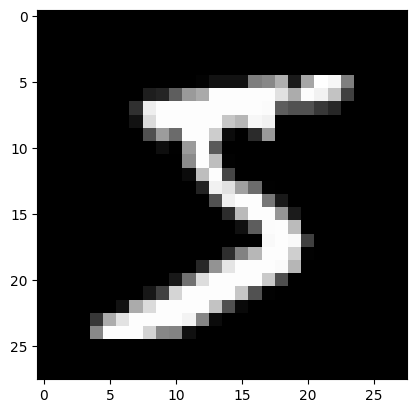

In [ ]:
image = x_train[0]
plt.imshow(image, cmap='gray')

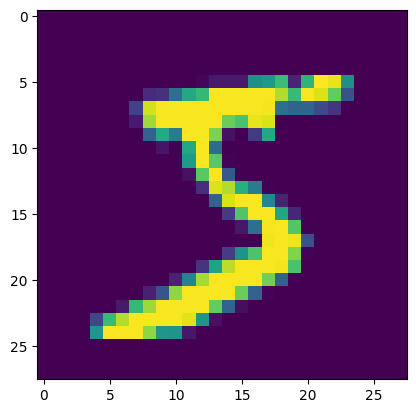

In [ ]:
image = x_train[0]
plt.imshow(image)

De esta forma podemos ahora ver que es una imagen de 28x28 pixeles de un 5. O es un 3? La respuesta está en el conjunto de datos `y_train` data, que contiene las etiquetas correctas para los datos. Veamos:

In [ ]:
y_train[0]

5

In [ ]:
type(y_train[0])

numpy.uint8

In [ ]:
y_train.min()

0

In [ ]:
y_train.max()

9

### 3. Preparamos el dataset

En aprendizaje profundo es usual que los datos requieran ser transformados a un estado ideal para el entrenamiento. Para este problema en particular de clasificación de imágenes hay tres tareas que deberíamos realizar con los datos como preparación para el entrenamiento:

1. Achatar la imagen, esto es, simplificar la entrada de la imagen en el modelo,
2. normalizar la imagen, es decir, hacer que los valores de las entradas de la imagen sean más fáciles de trabajar por el modelo,
3. cateogorizar las etiquetas, esto significa modificar las entradas de las etiquetas a valores que puedan ser trabajados por el modelo.

#### 3.1 Achatar la imagen

Hay modelos de aprendizaje profundo que aceptan imágenes 2d (en nuestro caso pixeles 28x28), pero aquí simplificaremos la codificación de la imagen en un único array de 784(=28x28) pixeles. Para esto utilizaremos el método reshape (https://www.tensorflow.org/api_docs/python/tf/reshape).

In [ ]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

Veamos que ahora la codificación de la imagen ha sido reformada y los conjuntos de datos de entrenamiento y de validación constan de arrays 1d de 784 valores de pixeles cada uno.

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### 3.2 Normalizar la imagen

Los modelos de aprendizaje profundo son mejores al momento de lidiar con números de punto flotante entre 0 y 1 (más detalles a su debido tiempo). El proceso de convertir valores enteros a valores de punto flotante entre 0 y 1 se llama normalización (https://developers.google.com/machine-learning/glossary#normalization). En este caso simplemente dividiremos los valores de los pixeles (que estaban entre 0 y 255) por 255.

In [6]:
x_train = x_train / 255
x_valid = x_valid / 255

Podemos ver ahora que los valores son todos puntos flotantes entre `0.0` y `1.0`:

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

#### 3.3 Codificación categórica

Si nos preguntamos qué es 7-2, responder 4 es más acertado que responder 9. Sin embargo, para una tarea de clasificación no nos sirve este tipo de razonamiento, sino que queremos que la red neuronal seleccione la cateogoría correcta y que entienda que si tenemos una imagen del número 5, declarar 4 es tan malo como declarar 9.

Las etiquetas para las imagenes son enteros entre 0 y 9, y como estos valores están en un rango numérico el modelo podría tratar de sacar conclusiones acerca de su desempeño basadas en cuán cerca estén sus respuestas respecto de la categoría correcta.

Por lo tanto, vamos a codificar las categorías de nuestros datos. Este tipo de tranformación modifica los datos de modo tal que cada valor es una colección de todas las posibles categorías, con la categoría correcta indicada con el valor booleano True.

Veamos un ejemplo de cómo es esta codificación.


Supongamos que tenemos tres categorías: rojo (red), azul (blue) y verde (green). Para un color dado, dos de estas categorías serían falsas y la que resta, verdadera.

![Imagen](https://drive.google.com/uc?export=view&id=1iSIg14I-oWRoEXfG6gRH3h3deMR9cYmG)

Los valores booleanos True y False pueden ser igualmente representados usando los valores binarios 1 y 0:

![Imagen](https://drive.google.com/uc?export=view&id=1SLE77xFd1_LZyGgGejxeHgzOS5wkZvPE)



Esto es la codificación categórica: transformar valores que se pretenden entender como etiquetas categóricas en una representación que explicite su naturaleza categórica para el modelo. Así, si usamos estos valores para entrenamiento, convertimos

In [ ]:
values = ['red, green, blue, green']

que para una red neuronal sería difícil interpretar, a la siguiente expresión donde observamos que cada columna corresponde a un color de acuerdo a RBG, y cada fila a un elemento de la lista:

In [ ]:
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]

Keras provee de una utilidad para [codificar valores categóricamente](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical). La usaremos a continuación para que codifique categóricamente las etiquetas para ambos entrenamiento y validación:

In [7]:
import tensorflow.keras as keras

In [8]:
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Aquí están los 10 primeros valores de las etiquetas de entrenamiento, que se puede ver que han sido codificadas categóricamente:


In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

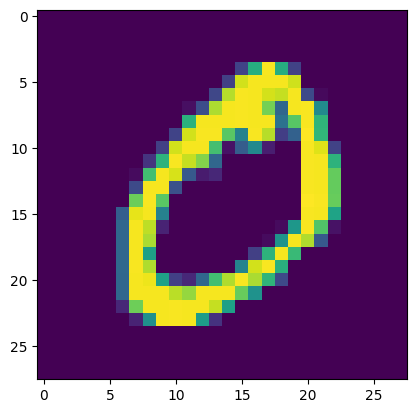

In [ ]:
plt.imshow(x_train[1].reshape(28,28))

In [ ]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 4. Creamos el modelo

Ya tenemos los datos preparados para ser entrenados. Es momento de crear el modelo que entrenará estos datos. El primer modelo básico que construiremos constará de varias capas que estarán distribuídas en tres partes principales:

- Una **capa de entrada** o **Input layer**: recibe los datos en algún formato preestablecido o esperado.
- Varias **capas ocultas** o **Hidden layers**: cada una compuesta de muchas neuronas; cada neurona tendrá la habilidad de afectar la predicción de la red mediante sus pesos, que son valores que se acualizarán a lo largo de varias iteraciones mientras la red obtiene retroalimentación sobre su desempeño y aprende.
- Una **capa de salida** o **Output layer**: que representará la predicción de la red para una imagen dada.

#### 4.1 Instanciando el modelo

En Python todo es un objeto de alguna clase. Instanciar un objeto de una clase es como crearlo, darle entidad al objeto de su tipo en su clase. En este caso, usaremos el método "Sequential model class" de Keras que sirve para instanciar un objeto de la clase Sequential, que será un modelo que tendrá una serie de capas por las cuales pasarán los datos en sucesión:

In [11]:
from tensorflow.keras.models import Sequential


In [12]:
model = Sequential()

##### 4.1.1 Creando la capa de entrada (Input Layer)

Agregaremos al modelo la primera capa: la de entrada. Esta capa estará *densamente conectada*, esto significa que cada neurona y cada uno de sus pesos afectará a toda las neuronas en la siguiente capa. Para hacer esto con Keras importamos la clase de capas que ya tiene incorparada Keras llamada [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In [13]:
from tensorflow.keras.layers import Dense

Agregamos al modelo entonces una capa Dense.

- El argumento "unit" especifica la cantidad de neuronas en la capa. Vamos a usar 512, cantidad elegida por experimentación. Esta elección en cuanto a cantidad de neuronas es uno de los objetivos específicos del modelado en Ciencia de Datos: la cantidad debe reflejar la complejidad estadística del dataset. **Dejamos como ejercicio jugar con este valor para ver cómo afecta al entrenamiento del modelo y empezar a desarrollar un sentido del significado de tal cantidad.**

- Más adelante seguramente aprenderemos más sobre *funciones de activación* (*activation functions*), pero por ahora aceptemos el uso de la función activación ReLu. ReLu significa *Rectified Linear Unit* y es la función $ReLu:\mathbb{R}\to\mathbb{R}$ dada por $ReLu(x)=max\{0,x\}$. Su gráfica es constante igual a 0 para los negativos y luego es la identidad. La utilidad de usar esta función activación es la siguiente: ayudará a la red neuronal a aprender a realizar predicciones más sofisticadas sobre los datos que si se le requiriera realizar predicciones basadas sólo en alguna función estrictamente lineal. Más precisamente, previene el crecimiento exponencial en los cálculos requeridos para operar la red neuronal, aunque tal uso debe ser monitoreado pues si la red neuronal es demasiado grande, el costo computacional de agregar extra ReLus también crece. Ya estudiaremos en más detalle más funciones de activación. Y claro que ReLu no es la única, hay otras, que las iremos viendo según vayan apareciendo: sigmoide, tanh, etc. Algunos ejemplos comunes y sus características: https://www.diegocalvo.es/funcion-de-activacion-redes-neuronales/

- Finalmente, el valor input_shape especifica 784 valores: la forma en la cual los valores son ingresados, en este caso es un array 1D de 784 valores:

In [14]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

##### 4.1.2 Creando la capa oculta

Agregamos ahora una capa oculta, que también estará densamente conectada. Esta capa proveerá a la red de más parámetros para contribuir a las prediciones, con lo cual habrá más oportunidades para un aprendizaje más preciso:

In [15]:
model.add(Dense(units = 512, activation='relu'))

##### 4.1.3 Creando la capa de salida

Finalmente agregamos la capa de salida. En este caso usamos la función activación softmax (https://en.wikipedia.org/wiki/Softmax_function), que resultará en que cada uno de los valores de la capa sea una probabilidad: un número entre 0 y 1, con todas las capas que suman 1. En este caso, como la red tiene que predecir una imagen entre 10 posibles categorías, habrá 10 salidas. Cada salida es una predicción del modelo: una probabilidad de que la imagen pertenezca a esa clase específica:

In [16]:
model.add(Dense(units = 10, activation='softmax'))

#### 4.2 Resumen del modelo:

Keras tiene un método para mostrar un resumen del modelo:[summary](https://www.tensorflow.org/api_docs/python/tf/summary):

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Observar la cantidad de parámetros entrenables. Cada uno de estos puede ser ajustado durante el entrenamiento y contribuirá a las predicciones del modelo.

#### 4.3 Compilando el modelo

El último paso que debemos realizar antes de entrenar el modelo con datos es compilarlo. Para esto Keras tiene el método [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile).

Aquí debemos especificar una función de pérdida: [loss function](https://developers.google.com/machine-learning/glossary#loss), que se usará para que el modelo entienda qué tan bien está aprendiendo durante el entrenamiento.

Especificamos además que queremos controlar la `accuracy` mientras el modelo entrena. Hay varias formas de medir qué tan bien está funcionando el modelo, 'accuracy' es una de las llamadas métricas que miden esto.

Las funciones de pérdida y las métricas también son conceptos específicos de Ciencia de Datos que seguramente iremos estudiando a lo largo del curso.

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### 5. Entrenando el modelo

Ya hemos preparado los datos de entrenamiento y validación, y hemos creado un modelo. Es momento de entrenarlo con nuestros datos de entrenamiento y verificarlo con los datos de validación.

Decimos "entrenando un modelo con datos" ("Training a model with data") o también "adecuando un modelo a los datos" ("fitting a model to data"). Esto último indica que la forma del modelo cambia en el tiempo para entender más precisamente los datos que le son dados.

Cuando entrenemos un modelo en Keras usamos el método [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit). Este método precisa los siguientes argumentos:

* Los datos de entrenamiento.
* Las etiquetas (labels) para los datos de entrenamiento.
* La cantidad de veces que debería entrenar en todo el dataset (cada una de estas veces se llama *epoch*)
* Los datos de test o validación y sus etiquetas.


La siguiente celda es la que entrena el modelo. Lleva un rato, discutiremos la salida luego que se complete el entrenamiento:

In [19]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1850 - accuracy: 0.9444 - val_loss: 0.0973 - val_accuracy: 0.9727
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0846 - accuracy: 0.9762 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0622 - accuracy: 0.9831 - val_loss: 0.0807 - val_accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0473 - accuracy: 0.9869 - val_loss: 0.0874 - val_accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0352 - accuracy: 0.9901 - val_loss: 0.0893 - val_accuracy: 0.9807


#### 5.1 Observando "Accuracy"

Para cada una de las 5 epochs (etapas, épocas, hitos, no hay una traducción fiel de este término), observar los valores de  `accuracy` y `val_accuracy`.

- `accuracy` dice cuán bien estuvo el modelo para la epoch sobre todos los datos de entrenamiento.

- `val_accuracy` dice cuán bien estuvo el modelo para la epoch sobre todos los datos de validación, recordemos que estos datos no fueron usados para entrenar el modelo.


El modelo estuvo bastante bien, el valor de accuracy llegó cerca del 100% rápidamente, al igual que el valor de validation accuracy.

Tenemos así un modelo que puede ser utilizado para detectar y clasificar con predicción imágenes de dígitos escritos a mano.

El próximo paso sería usar este modelo para clasificar imágenes escritas a mano aún no vistas. Esto se llama inferencia: [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). Quizás más adelante exploremos este concepto.

### 6. Resumen

Reflexionemos sobre lo que hemos hecho aquí. Históricamente, los sistemas expertos fueron que fueron creados para realizar este tipo de tareas eran extremadamente complicados, y algunas personas pasaron sus carreras construyéndolos: invitamos a ver las referencias históricas en [official MNIST page](http://yann.lecun.com/exdb/mnist/) y los años en los cuales se alcanzaron ciertos hitos.

MNIST  no es sólo útil por su influencia histórica en el campo de la visión por computadora (Computer Vision), sino también es un gran punto de referencia [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) y una herramienta de depuración (debugging tool): si se tienen problemas con el funcionamiento de alguna nueva y elaborada arquitectura de ML, se la chequea con el MNIST. Si no puede aprender de este dataset, lo más probable es que no aprenda de imágenes y datasets más complicados.

### 7. Probemos! ☆☆☆


Importamos de Keras las funcionalidades de preprocesamiento de imágenes 'image' y creamos una función para adecuar una imágen al lenguaje necesario para que el modelo de ML lo pueda procesar:

In [20]:
from tensorflow.keras.preprocessing import image as image_utils


In [22]:
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

Cargamos la imagen en nuestra variable utilizando la función recién definida, de paso la mostramos como la interpreta esta función:

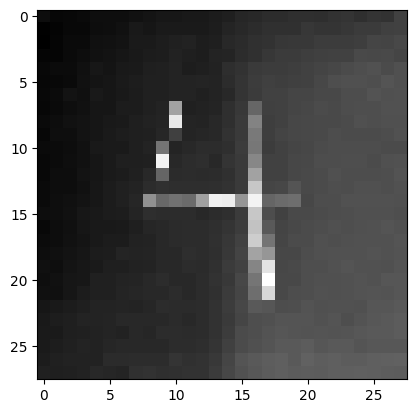

In [23]:
image = load_and_scale_image('/content/drive/MyDrive/MyML/TMAA/Clases/4jor.jpeg')
plt.imshow(image, cmap='gray')

Llevamos la imagen al formato para poder ser evaluada (la achatamos, normalizamos, etc.):

In [24]:
image = image_utils.img_to_array(image)
image = image.reshape(1,784,1)
image = image / 255

Predecimos:

In [25]:
prediction = model.predict(image)
print(prediction)

1/1 [==============================] - 0s 85ms/step
[[0.02060672 0.01105801 0.00759988 0.01350201 0.01106307 0.01538413
  0.01538941 0.00631113 0.8729223  0.02616327]]


Para entender la salida, recordemos que predice una categoría entre 0 y 9. En realidad, el modelo devuelve un array de 10 entradas, cada una de ellas una probabilidad. Como en Python empezamos a contar desde cero, la predicción final la conseguimos como sigue:

In [26]:
prediction.argmax()

8


---


Estas notebooks corresponden a la asignatura electiva para la Licenciatura en Matemática del Departamento de Matemática de la Escuela de Cs. Exactas y Naturales, de la Facultad de Cs. Exactas, Ingenieria y Agrimensura (FCEIA) de la Universidad Nacional de Rosario, Argentina. Año 2023.

Fueron confeccionadas a tal fin por las docentes investigadoras de la FCEIA Isolda Cardoso y Jorgelina Walpen. Este trabajo de análisis, estudio, recopilación, traducción, armado, pruebas y errores, nos ha llevado mucho tiempo. Cuando hay tanta información disponible es complicado extraer lo que, al menos para nosotras, es relevante. Hay muchísimos otros recursos y tutoriales, nosotras armamos este.

Si estas notebooks son reproducidas, solicitamos citar la fuente.

Dejamos nuestras páginas laborales y repositorios de GitHub. Seguramente en un futuro las pondremos a disposición en el Repositorio Hipermedial de la UNR.

Isolda: Te dejo mi página laboral https://www.fceia.unr.edu.ar/~isolda/ y mi GitHub https://github.com/IsoldaEugenia. Sentite libre de contactarme.

Jorgelina: https://www.fceia.unr.edu.ar/~walpen/ y  https://github.com/JorWalpen